# Supervised Machine Learning Model to Predict CO2 Level

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [3]:
# Load data
file_path = "./Data file/usa_co2_temp_1800_2013.csv"
predict_temp_df = pd.read_csv(file_path)
predict_temp_df

,country,year,co2,co2_per_capita,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,gas_co2,...,co2_per_gdp,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,energy_per_gdp,Avg Temperature,Avg Temperature Uncertainty
0,United States,1800,0.253,0.042,NaN,NaN,0.253,0.042,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6000000,NaN,NaN,12.377868,3.205628
1,United States,1801,0.267,0.044,NaN,NaN,0.267,0.044,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6113782,NaN,NaN,12.681863,2.895417
2,United States,1802,0.289,0.046,NaN,NaN,0.289,0.046,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6229723,NaN,NaN,12.859703,3.065703
3,United States,1803,0.297,0.047,NaN,NaN,0.297,0.047,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6347862,NaN,NaN,12.692603,3.065032
4,United States,1804,0.333,0.052,NaN,NaN,0.333,0.052,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6468241,NaN,NaN,12.576432,3.379515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,United States,2009,5478.210,17.885,29.615,0.097,1905.943,6.222,39.071,1245.742,...,0.368,649.89,2.122,241.81,0.789,306307565,1.489429e+13,1.676,11.156327,0.220114
210,United States,2010,5675.786,18.368,31.449,0.102,2013.304,6.515,41.343,1308.832,...,0.372,650.38,2.105,247.17,0.800,309011469,1.527062e+13,1.688,11.732877,0.211351
211,United States,2011,5540.173,17.781,32.208,0.103,1903.555,6.109,45.542,1327.528,...,0.357,628.73,2.018,255.55,0.820,311584051,1.550930e+13,1.650,11.811093,0.232825
212,United States,2012,5338.698,17.000,35.270,0.112,1684.037,5.362,48.883,1388.255,...,0.337,618.71,1.970,246.42,0.785,314043885,1.584964e+13,1.567,12.761842,0.269340


## Data Preprocessing

In [4]:
# Removing the NaN values by replacing the NaN values with the mean average. 
predict_temp_df['flaring_co2'].fillna(predict_temp_df['flaring_co2'].mean(), inplace = True)
predict_temp_df['cement_co2'].fillna(predict_temp_df['cement_co2'].mean(), inplace = True)
predict_temp_df['cement_co2_per_capita'].fillna(predict_temp_df['cement_co2_per_capita'].mean(), inplace = True)
predict_temp_df['gas_co2'].fillna(predict_temp_df['gas_co2'].mean(), inplace = True)
predict_temp_df['gas_co2_per_capita'].fillna(predict_temp_df['gas_co2_per_capita'].mean(), inplace = True)
predict_temp_df['oil_co2'].fillna(predict_temp_df['oil_co2'].mean(), inplace = True)
predict_temp_df['oil_co2_per_capita'].fillna(predict_temp_df['oil_co2_per_capita'].mean(), inplace = True)
predict_temp_df['co2_per_gdp'].fillna(predict_temp_df['co2_per_gdp'].mean(), inplace = True)
predict_temp_df['methane'].fillna(predict_temp_df['methane'].mean(), inplace = True)
predict_temp_df['methane_per_capita'].fillna(predict_temp_df['methane_per_capita'].mean(), inplace = True)
predict_temp_df['nitrous_oxide'].fillna(predict_temp_df['nitrous_oxide'].mean(), inplace = True)
predict_temp_df['nitrous_oxide_per_capita'].fillna(predict_temp_df['nitrous_oxide_per_capita'].mean(), inplace = True)
predict_temp_df['gdp'].fillna(predict_temp_df['gdp'].mean(), inplace = True)
predict_temp_df['energy_per_gdp'].fillna(predict_temp_df['energy_per_gdp'].mean(), inplace = True)
predict_temp_df['co2_growth_prct'].fillna(predict_temp_df['co2_growth_prct'].mean(), inplace = True)

predict_temp_df

,country,year,co2,co2_per_capita,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,gas_co2,...,co2_per_gdp,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,energy_per_gdp,Avg Temperature,Avg Temperature Uncertainty
0,United States,1800,0.253,0.042,18.398612,0.085731,0.253,0.042,27.881063,497.198833,...,0.718742,688.9625,2.4435,259.413333,0.916625,6000000,3.055051e+12,2.602592,12.377868,3.205628
1,United States,1801,0.267,0.044,18.398612,0.085731,0.267,0.044,27.881063,497.198833,...,0.718742,688.9625,2.4435,259.413333,0.916625,6113782,3.055051e+12,2.602592,12.681863,2.895417
2,United States,1802,0.289,0.046,18.398612,0.085731,0.289,0.046,27.881063,497.198833,...,0.718742,688.9625,2.4435,259.413333,0.916625,6229723,3.055051e+12,2.602592,12.859703,3.065703
3,United States,1803,0.297,0.047,18.398612,0.085731,0.297,0.047,27.881063,497.198833,...,0.718742,688.9625,2.4435,259.413333,0.916625,6347862,3.055051e+12,2.602592,12.692603,3.065032
4,United States,1804,0.333,0.052,18.398612,0.085731,0.333,0.052,27.881063,497.198833,...,0.718742,688.9625,2.4435,259.413333,0.916625,6468241,3.055051e+12,2.602592,12.576432,3.379515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,United States,2009,5478.210,17.885,29.615000,0.097000,1905.943,6.222,39.071000,1245.742000,...,0.368000,649.8900,2.1220,241.810000,0.789000,306307565,1.489429e+13,1.676000,11.156327,0.220114
210,United States,2010,5675.786,18.368,31.449000,0.102000,2013.304,6.515,41.343000,1308.832000,...,0.372000,650.3800,2.1050,247.170000,0.800000,309011469,1.527062e+13,1.688000,11.732877,0.211351
211,United States,2011,5540.173,17.781,32.208000,0.103000,1903.555,6.109,45.542000,1327.528000,...,0.357000,628.7300,2.0180,255.550000,0.820000,311584051,1.550930e+13,1.650000,11.811093,0.232825
212,United States,2012,5338.698,17.000,35.270000,0.112000,1684.037,5.362,48.883000,1388.255000,...,0.337000,618.7100,1.9700,246.420000,0.785000,314043885,1.584964e+13,1.567000,12.761842,0.269340


In [5]:
predict_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      214 non-null    object 
 1   year                         214 non-null    int64  
 2   co2                          214 non-null    float64
 3   co2_per_capita               214 non-null    float64
 4   cement_co2                   214 non-null    float64
 5   cement_co2_per_capita        214 non-null    float64
 6   coal_co2                     214 non-null    float64
 7   coal_co2_per_capita          214 non-null    float64
 8   flaring_co2                  214 non-null    float64
 9   gas_co2                      214 non-null    float64
 10  gas_co2_per_capita           214 non-null    float64
 11  oil_co2                      214 non-null    float64
 12  oil_co2_per_capita           214 non-null    float64
 13  co2_growth_prct     

In [6]:
# Print columns in the DataFrame
predict_temp_df.columns

Index(['country', 'year', 'co2', 'co2_per_capita', 'cement_co2',
       'cement_co2_per_capita', 'coal_co2', 'coal_co2_per_capita',
       'flaring_co2', 'gas_co2', 'gas_co2_per_capita', 'oil_co2',
       'oil_co2_per_capita', 'co2_growth_prct', 'co2_per_gdp', 'methane',
       'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita',
       'population', 'gdp', 'energy_per_gdp', 'Avg Temperature',
       'Avg Temperature Uncertainty'],
      dtype='object')

In [7]:
# Create our features
X = predict_temp_df.drop(columns = "Avg Temperature")
X = pd.get_dummies(X, columns = ["country"])

# Create our target
y = predict_temp_df['Avg Temperature'].astype('int').to_frame()

In [8]:
X.describe()

,year,co2,co2_per_capita,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,gas_co2,gas_co2_per_capita,...,co2_per_gdp,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,energy_per_gdp,Avg Temperature Uncertainty,country_United States
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,...,214.000000,214.000000,214.000000,214.000000,214.000000,2.140000e+02,2.140000e+02,214.000000,214.000000,214.0
mean,1906.500000,1775.834846,9.659154,18.398612,0.085731,777.669472,5.111668,27.881063,497.198833,2.186538,...,0.718742,688.962500,2.443500,259.413333,0.916625,1.119351e+08,3.055051e+12,2.602592,1.052999,1.0
std,61.920648,2020.307607,7.936626,12.609423,0.052663,713.472753,3.865967,8.113161,387.022883,1.459075,...,0.410101,16.864325,0.117713,3.319460,0.028872,9.337697e+07,4.122802e+12,0.337572,1.088695,0.0
min,1800.000000,0.253000,0.042000,0.000000,0.000000,0.253000,0.042000,4.990000,0.165000,0.003000,...,0.029000,618.710000,1.956000,241.810000,0.782000,6.000000e+06,2.668967e+10,1.567000,0.169596,1.0
25%,1853.250000,30.911250,1.185250,10.409500,0.076500,30.911250,1.185250,27.881063,99.791250,0.769000,...,0.399500,688.962500,2.443500,259.413333,0.916625,2.607410e+07,2.198610e+11,2.602592,0.230978,1.0
50%,1906.500000,1044.142000,10.775000,18.398612,0.085731,887.893500,5.586500,27.881063,497.198833,2.186538,...,0.718742,688.962500,2.443500,259.413333,0.916625,8.967570e+07,1.237754e+12,2.602592,0.389550,1.0
75%,1959.750000,2879.977000,16.341000,28.458000,0.130500,1312.315750,7.463000,27.881063,620.821250,3.324750,...,0.993250,688.962500,2.443500,259.413333,0.916625,1.859870e+08,3.242571e+12,2.602592,1.691417,1.0
max,2013.000000,6134.521000,22.236000,46.851000,0.171000,2214.838000,14.344000,54.647000,1427.506000,5.231000,...,1.648000,770.750000,3.044000,281.250000,1.048000,3.164005e+08,1.610843e+13,3.746000,3.706145,1.0


## Visualizing the temperature data

<AxesSubplot:xlabel='population', ylabel='Avg Temperature'>

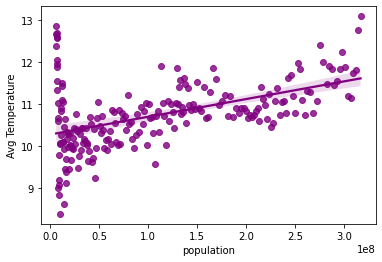

In [9]:
# Scatter plot between population and Avg Temperature
import seaborn as sns
sns.regplot(x = 'population', y = 'Avg Temperature', color="purple", data = predict_temp_df)

<AxesSubplot:xlabel='co2', ylabel='Avg Temperature'>

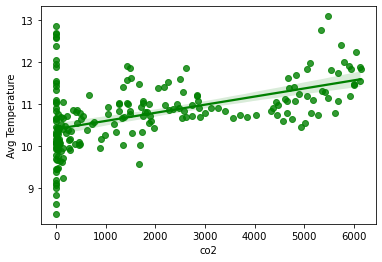

In [10]:
import seaborn as sns
sns.regplot(x = 'co2', y = 'Avg Temperature', color="green", data = predict_temp_df)

<AxesSubplot:xlabel='gdp', ylabel='Avg Temperature'>

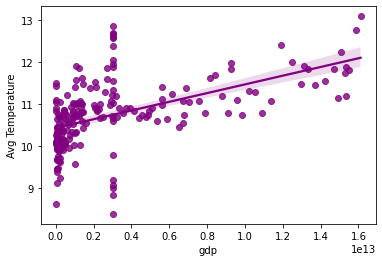

In [11]:
import seaborn as sns
sns.regplot(x = 'gdp', y = 'Avg Temperature', color="purple", data = predict_temp_df)

In [12]:
y['Avg Temperature'].value_counts()

10    114
11     57
9      27
12     11
8       4
13      1
Name: Avg Temperature, dtype: int64

### Splitting the dataset into the Training and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

<AxesSubplot:title={'center':'Average Temperature'}, xlabel='year'>

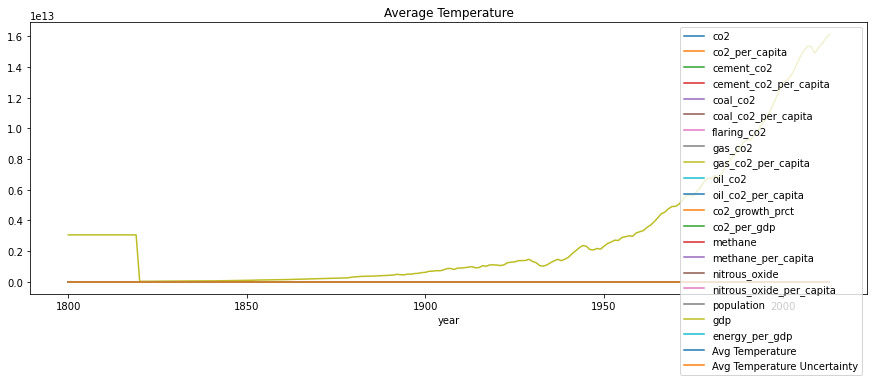

In [14]:
predict_temp_df.plot(x='year', y=['co2', 'co2_per_capita', 'cement_co2',
       'cement_co2_per_capita', 'coal_co2', 'coal_co2_per_capita',
       'flaring_co2', 'gas_co2', 'gas_co2_per_capita', 'oil_co2',
       'oil_co2_per_capita', 'co2_growth_prct', 'co2_per_gdp', 'methane',
       'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita',
       'population', 'gdp', 'energy_per_gdp','Avg Temperature',
       'Avg Temperature Uncertainty'], figsize=(15,5), 
        title='Average Temperature')

### Standardize data for machine learning

In [15]:
# Define predictor variable columns
df_x = predict_temp_df[['co2', 'co2_per_capita', 'cement_co2',
       'cement_co2_per_capita', 'coal_co2', 'coal_co2_per_capita',
       'flaring_co2', 'gas_co2', 'gas_co2_per_capita', 'oil_co2',
       'oil_co2_per_capita', 'co2_growth_prct', 'co2_per_gdp', 'methane',
       'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita',
       'population', 'gdp', 'energy_per_gdp',
       'Avg Temperature Uncertainty']]

In [16]:
# Standardize the values for each predictor variable
predict_temp_df[['co2', 'co2_per_capita', 'cement_co2',
       'cement_co2_per_capita', 'coal_co2', 'coal_co2_per_capita',
       'flaring_co2', 'gas_co2', 'gas_co2_per_capita', 'oil_co2',
       'oil_co2_per_capita', 'co2_growth_prct', 'co2_per_gdp', 'methane',
       'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita',
       'population', 'gdp', 'energy_per_gdp',
       'Avg Temperature Uncertainty']] = (df_x-df_x.mean())/df_x.std()

predict_temp_df

,country,year,co2,co2_per_capita,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,gas_co2,...,co2_per_gdp,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,energy_per_gdp,Avg Temperature,Avg Temperature Uncertainty
0,United States,1800,-0.878867,-1.211743,8.452521e-16,1.844657e-15,-1.089623,-1.311358,-3.065266e-15,-2.937471e-16,...,-5.414393e-16,1.280840e-13,9.808845e-14,2.226158e-13,-4.999004e-14,-1.134488,-2.368686e-16,5.262153e-15,12.377868,1.977256
1,United States,1801,-0.878860,-1.211491,8.452521e-16,1.844657e-15,-1.089604,-1.310841,-3.065266e-15,-2.937471e-16,...,-5.414393e-16,1.280840e-13,9.808845e-14,2.226158e-13,-4.999004e-14,-1.133269,-2.368686e-16,5.262153e-15,12.681863,1.692318
2,United States,1802,-0.878849,-1.211239,8.452521e-16,1.844657e-15,-1.089573,-1.310324,-3.065266e-15,-2.937471e-16,...,-5.414393e-16,1.280840e-13,9.808845e-14,2.226158e-13,-4.999004e-14,-1.132028,-2.368686e-16,5.262153e-15,12.859703,1.848731
3,United States,1803,-0.878845,-1.211113,8.452521e-16,1.844657e-15,-1.089562,-1.310065,-3.065266e-15,-2.937471e-16,...,-5.414393e-16,1.280840e-13,9.808845e-14,2.226158e-13,-4.999004e-14,-1.130763,-2.368686e-16,5.262153e-15,12.692603,1.848115
4,United States,1804,-0.878827,-1.210483,8.452521e-16,1.844657e-15,-1.089511,-1.308772,-3.065266e-15,-2.937471e-16,...,-5.414393e-16,1.280840e-13,9.808845e-14,2.226158e-13,-4.999004e-14,-1.129473,-2.368686e-16,5.262153e-15,12.576432,2.136977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,United States,2009,1.832580,1.036441,8.895243e-01,2.139782e-01,1.581383,0.287207,1.379233e+00,1.934106e+00,...,-8.552590e-01,-2.316873e+00,-2.731211e+00,-5.303071e+00,-4.420442e+00,2.081589,2.871650e+00,-2.744870e+00,11.156327,-0.765031
210,United States,2010,1.930375,1.097298,1.034971e+00,3.089222e-01,1.731859,0.362996,1.659272e+00,2.097119e+00,...,-8.455053e-01,-2.287818e+00,-2.875630e+00,-3.688351e+00,-4.039444e+00,2.110546,2.962929e+00,-2.709322e+00,11.732877,-0.773080
211,United States,2011,1.863250,1.023337,1.095164e+00,3.279110e-01,1.578036,0.257977,2.176826e+00,2.145427e+00,...,-8.820817e-01,-3.571593e+00,-3.614713e+00,-1.163844e+00,-3.346720e+00,2.138097,3.020822e+00,-2.821890e+00,11.811093,-0.753355
212,United States,2012,1.763525,0.924933,1.337998e+00,4.988101e-01,1.270360,0.064753,2.588626e+00,2.302335e+00,...,-9.308502e-01,-4.165746e+00,-4.022484e+00,-3.914291e+00,-4.558987e+00,2.164440,3.103371e+00,-3.067764e+00,12.761842,-0.719815


In [17]:
# Fitting the Linear Regression Classifier
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

### Regression analysis

In [18]:
# Checking the model with intercept and coefficients (slope)
# Print the intercept and coefficients

print('intercept:', linreg.intercept_)
print('slope:', linreg.coef_)

intercept: [218.551422]
slope: [[-1.06437849e-01 -4.91351689e-02  1.08122318e+01  8.17103038e-02
  -1.58217024e+01  4.81988025e-02 -1.07985273e+01 -1.03965024e-03
   5.68197430e-02 -1.30827957e+01  4.50360188e-02 -9.82264147e+00
  -3.30505877e-03 -2.16975391e-01 -4.04948021e-02  6.50903874e+00
  -1.89786721e-04  1.26254085e+00  7.06375614e-08  1.86252149e-14
   1.01447798e-01 -1.36245965e+00  0.00000000e+00]]


In [19]:
y_pred = linreg.predict(X_test)
y_pred

array([[10.09321768],
       [10.96998215],
       [ 9.93349735],
       [ 9.92082979],
       [ 9.36482321],
       [ 9.75413342],
       [ 9.5747523 ],
       [10.70662837],
       [10.98036806],
       [ 8.59697943],
       [ 9.82853075],
       [ 9.64291136],
       [ 9.99575655],
       [ 9.56288391],
       [10.57019331],
       [ 9.88005523],
       [10.06131397],
       [10.01565414],
       [10.46513099],
       [ 9.08689118],
       [ 9.75048517],
       [10.97499526],
       [10.03142907],
       [ 9.49041251],
       [10.43480638],
       [ 9.76883956],
       [ 9.81738323],
       [10.7634425 ],
       [ 9.84540714],
       [ 9.67201915],
       [ 9.97586782],
       [10.34914572],
       [ 9.36949943],
       [ 9.88333591],
       [ 9.35792143],
       [11.63381166],
       [10.48060853],
       [10.11025076],
       [10.37428883],
       [ 9.56174008],
       [ 9.71094355],
       [10.90956494],
       [10.65753359],
       [ 8.94058183],
       [11.24020535],
       [ 9

In [20]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_pred)
print('r2 socre is', score)
print('mean_sqrd_error is==', mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is==', np.sqrt(mean_squared_error(y_test,y_pred)))

r2 socre is 0.5428944405610208
mean_sqrd_error is== 0.46353262663273725
root_mean_squared error of is== 0.68083230433987


<AxesSubplot:title={'center':'Average Temperature'}, xlabel='year'>

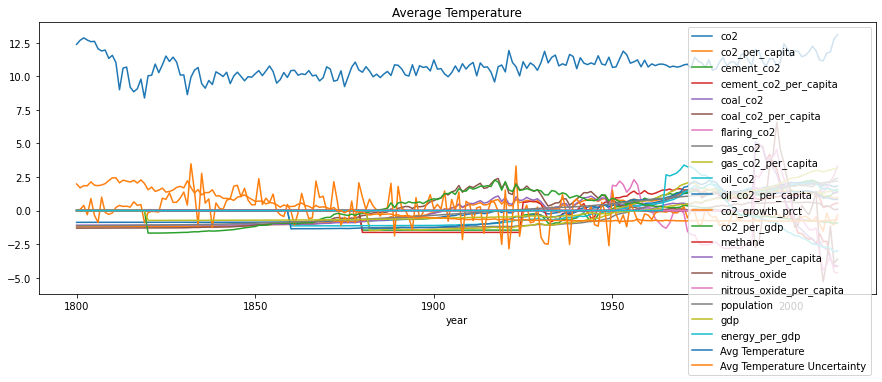

In [21]:
predict_temp_df.plot(x='year', y=['co2', 'co2_per_capita', 'cement_co2',
       'cement_co2_per_capita', 'coal_co2', 'coal_co2_per_capita',
       'flaring_co2', 'gas_co2', 'gas_co2_per_capita', 'oil_co2',
       'oil_co2_per_capita', 'co2_growth_prct', 'co2_per_gdp', 'methane',
       'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita',
       'population', 'gdp', 'energy_per_gdp','Avg Temperature',
       'Avg Temperature Uncertainty'], figsize=(15,5), 
        title='Average Temperature')

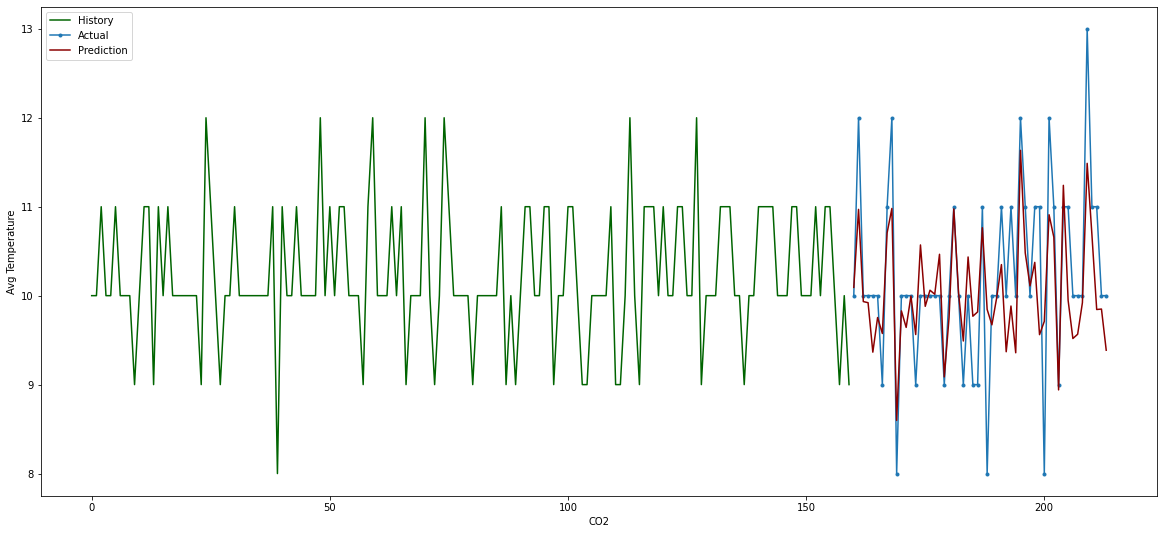

In [22]:
# Plot the predictions over the true (actual) values from the Time Series.
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 9))
plt.plot(np.arange(0, len(y_train)), y_train, 'darkgreen', label="History")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="Actual")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'darkred', label="Prediction")
plt.ylabel('Avg Temperature')
plt.xlabel('CO2')
plt.legend()
plt.show()

In [23]:
from sklearn import metrics

# Calculate the coefficients
print('Coefficients: \n', linreg.coef_)

# Calculate the mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

# Calculate the mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 

# Calculate the root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Calculate the R-squared (or coefficient of determinationnote. 1 is a perfect prediction.
print('Coefficient of Determination:', metrics.r2_score(y_test, y_pred))

Coefficients: 
 [[-1.06437849e-01 -4.91351689e-02  1.08122318e+01  8.17103038e-02
  -1.58217024e+01  4.81988025e-02 -1.07985273e+01 -1.03965024e-03
   5.68197430e-02 -1.30827957e+01  4.50360188e-02 -9.82264147e+00
  -3.30505877e-03 -2.16975391e-01 -4.04948021e-02  6.50903874e+00
  -1.89786721e-04  1.26254085e+00  7.06375614e-08  1.86252149e-14
   1.01447798e-01 -1.36245965e+00  0.00000000e+00]]
Mean Absolute Error: 0.5118921635195761
Mean Squared Error: 0.46353262663273725
Root Mean Squared Error: 0.68083230433987
Coefficient of Determination: 0.5428944405610208


# Multiple Linear Regression Model

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("./Data file/usa_co2_temp_1800_2013.csv")
df.head()

,country,year,co2,co2_per_capita,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,gas_co2,...,co2_per_gdp,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,energy_per_gdp,Avg Temperature,Avg Temperature Uncertainty
0,United States,1800,0.253,0.042,NaN,NaN,0.253,0.042,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6000000,NaN,NaN,12.377868,3.205628
1,United States,1801,0.267,0.044,NaN,NaN,0.267,0.044,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6113782,NaN,NaN,12.681863,2.895417
2,United States,1802,0.289,0.046,NaN,NaN,0.289,0.046,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6229723,NaN,NaN,12.859703,3.065703
3,United States,1803,0.297,0.047,NaN,NaN,0.297,0.047,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6347862,NaN,NaN,12.692603,3.065032
4,United States,1804,0.333,0.052,NaN,NaN,0.333,0.052,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6468241,NaN,NaN,12.576432,3.379515


In [26]:
# Removing the NaN values by replacing the NaN values with the mean average. 
df['flaring_co2'].fillna(df['flaring_co2'].mean(), inplace = True)
df['cement_co2'].fillna(df['cement_co2'].mean(), inplace = True)
df['cement_co2_per_capita'].fillna(df['cement_co2_per_capita'].mean(), inplace = True)
df['gas_co2'].fillna(predict_temp_df['gas_co2'].mean(), inplace = True)
df['gas_co2_per_capita'].fillna(df['gas_co2_per_capita'].mean(), inplace = True)
df['oil_co2'].fillna(df['oil_co2'].mean(), inplace = True)
df['oil_co2_per_capita'].fillna(df['oil_co2_per_capita'].mean(), inplace = True)
df['co2_per_gdp'].fillna(df['co2_per_gdp'].mean(), inplace = True)
df['methane'].fillna(df['methane'].mean(), inplace = True)
df['methane_per_capita'].fillna(df['methane_per_capita'].mean(), inplace = True)
df['nitrous_oxide'].fillna(df['nitrous_oxide'].mean(), inplace = True)
df['nitrous_oxide_per_capita'].fillna(df['nitrous_oxide_per_capita'].mean(), inplace = True)
df['gdp'].fillna(df['gdp'].mean(), inplace = True)
df['energy_per_gdp'].fillna(df['energy_per_gdp'].mean(), inplace = True)
df['co2_growth_prct'].fillna(df['co2_growth_prct'].mean(), inplace = True)

df

,country,year,co2,co2_per_capita,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,gas_co2,...,co2_per_gdp,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,energy_per_gdp,Avg Temperature,Avg Temperature Uncertainty
0,United States,1800,0.253,0.042,18.398612,0.085731,0.253,0.042,27.881063,-1.037592e-16,...,0.718742,688.9625,2.4435,259.413333,0.916625,6000000,3.055051e+12,2.602592,12.377868,3.205628
1,United States,1801,0.267,0.044,18.398612,0.085731,0.267,0.044,27.881063,-1.037592e-16,...,0.718742,688.9625,2.4435,259.413333,0.916625,6113782,3.055051e+12,2.602592,12.681863,2.895417
2,United States,1802,0.289,0.046,18.398612,0.085731,0.289,0.046,27.881063,-1.037592e-16,...,0.718742,688.9625,2.4435,259.413333,0.916625,6229723,3.055051e+12,2.602592,12.859703,3.065703
3,United States,1803,0.297,0.047,18.398612,0.085731,0.297,0.047,27.881063,-1.037592e-16,...,0.718742,688.9625,2.4435,259.413333,0.916625,6347862,3.055051e+12,2.602592,12.692603,3.065032
4,United States,1804,0.333,0.052,18.398612,0.085731,0.333,0.052,27.881063,-1.037592e-16,...,0.718742,688.9625,2.4435,259.413333,0.916625,6468241,3.055051e+12,2.602592,12.576432,3.379515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,United States,2009,5478.210,17.885,29.615000,0.097000,1905.943,6.222,39.071000,1.245742e+03,...,0.368000,649.8900,2.1220,241.810000,0.789000,306307565,1.489429e+13,1.676000,11.156327,0.220114
210,United States,2010,5675.786,18.368,31.449000,0.102000,2013.304,6.515,41.343000,1.308832e+03,...,0.372000,650.3800,2.1050,247.170000,0.800000,309011469,1.527062e+13,1.688000,11.732877,0.211351
211,United States,2011,5540.173,17.781,32.208000,0.103000,1903.555,6.109,45.542000,1.327528e+03,...,0.357000,628.7300,2.0180,255.550000,0.820000,311584051,1.550930e+13,1.650000,11.811093,0.232825
212,United States,2012,5338.698,17.000,35.270000,0.112000,1684.037,5.362,48.883000,1.388255e+03,...,0.337000,618.7100,1.9700,246.420000,0.785000,314043885,1.584964e+13,1.567000,12.761842,0.269340


In [27]:
# Define predictor variable columns
df_x = predict_temp_df[['co2', 'co2_per_capita', 'cement_co2',
       'cement_co2_per_capita', 'coal_co2', 'coal_co2_per_capita',
       'flaring_co2', 'gas_co2', 'gas_co2_per_capita', 'oil_co2',
       'oil_co2_per_capita', 'co2_growth_prct', 'co2_per_gdp', 'methane',
       'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita',
       'population', 'gdp', 'energy_per_gdp',
       'Avg Temperature Uncertainty']]

In [28]:
# Standardize the values for each predictor variable
predict_temp_df[['co2', 'co2_per_capita', 'cement_co2',
       'cement_co2_per_capita', 'coal_co2', 'coal_co2_per_capita',
       'flaring_co2', 'gas_co2', 'gas_co2_per_capita', 'oil_co2',
       'oil_co2_per_capita', 'co2_growth_prct', 'co2_per_gdp', 'methane',
       'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita',
       'population', 'gdp', 'energy_per_gdp',
       'Avg Temperature Uncertainty']] = (df_x-df_x.mean())/df_x.std()

predict_temp_df

,country,year,co2,co2_per_capita,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,gas_co2,...,co2_per_gdp,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,energy_per_gdp,Avg Temperature,Avg Temperature Uncertainty
0,United States,1800,-0.878867,-1.211743,-5.849021e-17,2.514352e-16,-1.089623,-1.311358,1.637193e-16,-1.899879e-16,...,-3.437781e-16,-1.664931e-16,-1.839288e-16,2.654721e-15,9.308037e-16,-1.134488,-1.808387e-16,-3.014127e-16,12.377868,1.977256
1,United States,1801,-0.878860,-1.211491,-5.849021e-17,2.514352e-16,-1.089604,-1.310841,1.637193e-16,-1.899879e-16,...,-3.437781e-16,-1.664931e-16,-1.839288e-16,2.654721e-15,9.308037e-16,-1.133269,-1.808387e-16,-3.014127e-16,12.681863,1.692318
2,United States,1802,-0.878849,-1.211239,-5.849021e-17,2.514352e-16,-1.089573,-1.310324,1.637193e-16,-1.899879e-16,...,-3.437781e-16,-1.664931e-16,-1.839288e-16,2.654721e-15,9.308037e-16,-1.132028,-1.808387e-16,-3.014127e-16,12.859703,1.848731
3,United States,1803,-0.878845,-1.211113,-5.849021e-17,2.514352e-16,-1.089562,-1.310065,1.637193e-16,-1.899879e-16,...,-3.437781e-16,-1.664931e-16,-1.839288e-16,2.654721e-15,9.308037e-16,-1.130763,-1.808387e-16,-3.014127e-16,12.692603,1.848115
4,United States,1804,-0.878827,-1.210483,-5.849021e-17,2.514352e-16,-1.089511,-1.308772,1.637193e-16,-1.899879e-16,...,-3.437781e-16,-1.664931e-16,-1.839288e-16,2.654721e-15,9.308037e-16,-1.129473,-1.808387e-16,-3.014127e-16,12.576432,2.136977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,United States,2009,1.832580,1.036441,8.895243e-01,2.139782e-01,1.581383,0.287207,1.379233e+00,1.934106e+00,...,-8.552590e-01,-2.316873e+00,-2.731211e+00,-5.303071e+00,-4.420442e+00,2.081589,2.871650e+00,-2.744870e+00,11.156327,-0.765031
210,United States,2010,1.930375,1.097298,1.034971e+00,3.089222e-01,1.731859,0.362996,1.659272e+00,2.097119e+00,...,-8.455053e-01,-2.287818e+00,-2.875630e+00,-3.688351e+00,-4.039444e+00,2.110546,2.962929e+00,-2.709322e+00,11.732877,-0.773080
211,United States,2011,1.863250,1.023337,1.095164e+00,3.279110e-01,1.578036,0.257977,2.176826e+00,2.145427e+00,...,-8.820817e-01,-3.571593e+00,-3.614713e+00,-1.163844e+00,-3.346720e+00,2.138097,3.020822e+00,-2.821890e+00,11.811093,-0.753355
212,United States,2012,1.763525,0.924933,1.337998e+00,4.988101e-01,1.270360,0.064753,2.588626e+00,2.302335e+00,...,-9.308502e-01,-4.165746e+00,-4.022484e+00,-3.914291e+00,-4.558987e+00,2.164440,3.103371e+00,-3.067764e+00,12.761842,-0.719815


In [29]:
# Create our features
X = df.drop(columns = "Avg Temperature")
X = pd.get_dummies(X, columns = ["country"])

# Create our target
y = df['Avg Temperature'].astype('int').to_frame()

In [30]:
# Drop Untied States
df = df.drop(columns = ['country'], axis=1)

In [31]:
X = predict_temp_df.iloc[:, 0:2].values
y = predict_temp_df.iloc[:, -1].values

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
encoder = OneHotEncoder(drop='first', dtype=int)
ct = ColumnTransformer([('categorical_encoding', encoder, [0])], remainder='passthrough')

In [33]:
X = ct.fit_transform(X)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [36]:
regressor.fit(X_train, y_train)

LinearRegression()

In [37]:
predictions = regressor.predict(X_test)

In [38]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, predictions)

In [39]:
N = len(X_test)

In [40]:
k=20

adjusted_r_squared = 1 - (((1 - (r_squared ** 2)) * (N - 1)) / (N - k - 1))

print(f'The adjusted R score of our model is: {adjusted_r_squared}')

The adjusted R score of our model is: 0.3776031445113833


### Model Prediction

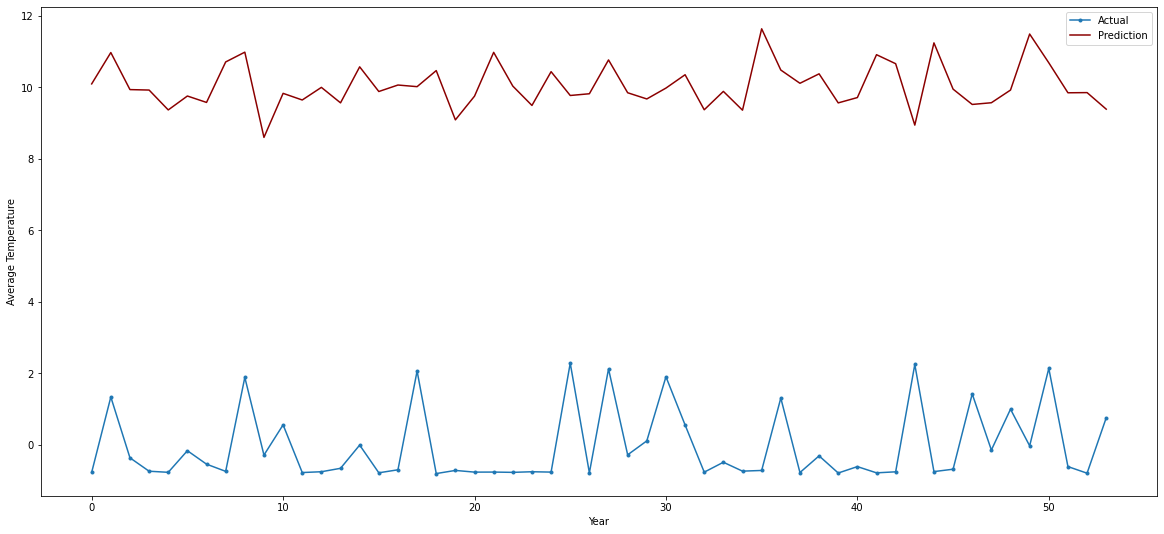

In [41]:
plt.figure(figsize=(20, 9))
plt.plot(y_test, marker='.', label="Actual")
plt.plot(y_pred, 'darkred', label="Prediction")
plt.ylabel('Average Temperature')
plt.xlabel('Year')
plt.legend()
plt.show()

## Random forest regression

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv("./Data file/usa_co2_temp_1800_2013.csv")
df.head()

,country,year,co2,co2_per_capita,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,gas_co2,...,co2_per_gdp,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,energy_per_gdp,Avg Temperature,Avg Temperature Uncertainty
0,United States,1800,0.253,0.042,NaN,NaN,0.253,0.042,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6000000,NaN,NaN,12.377868,3.205628
1,United States,1801,0.267,0.044,NaN,NaN,0.267,0.044,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6113782,NaN,NaN,12.681863,2.895417
2,United States,1802,0.289,0.046,NaN,NaN,0.289,0.046,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6229723,NaN,NaN,12.859703,3.065703
3,United States,1803,0.297,0.047,NaN,NaN,0.297,0.047,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6347862,NaN,NaN,12.692603,3.065032
4,United States,1804,0.333,0.052,NaN,NaN,0.333,0.052,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6468241,NaN,NaN,12.576432,3.379515


In [53]:
# Removing the NaN values by replacing the NaN values with the mean average. 
df['flaring_co2'].fillna(df['flaring_co2'].mean(), inplace = True)
df['cement_co2'].fillna(df['cement_co2'].mean(), inplace = True)
df['cement_co2_per_capita'].fillna(df['cement_co2_per_capita'].mean(), inplace = True)
df['gas_co2'].fillna(predict_temp_df['gas_co2'].mean(), inplace = True)
df['gas_co2_per_capita'].fillna(df['gas_co2_per_capita'].mean(), inplace = True)
df['oil_co2'].fillna(df['oil_co2'].mean(), inplace = True)
df['oil_co2_per_capita'].fillna(df['oil_co2_per_capita'].mean(), inplace = True)
df['co2_per_gdp'].fillna(df['co2_per_gdp'].mean(), inplace = True)
df['methane'].fillna(df['methane'].mean(), inplace = True)
df['methane_per_capita'].fillna(df['methane_per_capita'].mean(), inplace = True)
df['nitrous_oxide'].fillna(df['nitrous_oxide'].mean(), inplace = True)
df['nitrous_oxide_per_capita'].fillna(df['nitrous_oxide_per_capita'].mean(), inplace = True)
df['gdp'].fillna(df['gdp'].mean(), inplace = True)
df['energy_per_gdp'].fillna(df['energy_per_gdp'].mean(), inplace = True)
df['co2_growth_prct'].fillna(df['co2_growth_prct'].mean(), inplace = True)

df

,country,year,co2,co2_per_capita,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,gas_co2,...,co2_per_gdp,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,energy_per_gdp,Avg Temperature,Avg Temperature Uncertainty
0,United States,1800,0.253,0.042,18.398612,0.085731,0.253,0.042,27.881063,-3.735330e-17,...,0.718742,688.9625,2.4435,259.413333,0.916625,6000000,3.055051e+12,2.602592,12.377868,3.205628
1,United States,1801,0.267,0.044,18.398612,0.085731,0.267,0.044,27.881063,-3.735330e-17,...,0.718742,688.9625,2.4435,259.413333,0.916625,6113782,3.055051e+12,2.602592,12.681863,2.895417
2,United States,1802,0.289,0.046,18.398612,0.085731,0.289,0.046,27.881063,-3.735330e-17,...,0.718742,688.9625,2.4435,259.413333,0.916625,6229723,3.055051e+12,2.602592,12.859703,3.065703
3,United States,1803,0.297,0.047,18.398612,0.085731,0.297,0.047,27.881063,-3.735330e-17,...,0.718742,688.9625,2.4435,259.413333,0.916625,6347862,3.055051e+12,2.602592,12.692603,3.065032
4,United States,1804,0.333,0.052,18.398612,0.085731,0.333,0.052,27.881063,-3.735330e-17,...,0.718742,688.9625,2.4435,259.413333,0.916625,6468241,3.055051e+12,2.602592,12.576432,3.379515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,United States,2009,5478.210,17.885,29.615000,0.097000,1905.943,6.222,39.071000,1.245742e+03,...,0.368000,649.8900,2.1220,241.810000,0.789000,306307565,1.489429e+13,1.676000,11.156327,0.220114
210,United States,2010,5675.786,18.368,31.449000,0.102000,2013.304,6.515,41.343000,1.308832e+03,...,0.372000,650.3800,2.1050,247.170000,0.800000,309011469,1.527062e+13,1.688000,11.732877,0.211351
211,United States,2011,5540.173,17.781,32.208000,0.103000,1903.555,6.109,45.542000,1.327528e+03,...,0.357000,628.7300,2.0180,255.550000,0.820000,311584051,1.550930e+13,1.650000,11.811093,0.232825
212,United States,2012,5338.698,17.000,35.270000,0.112000,1684.037,5.362,48.883000,1.388255e+03,...,0.337000,618.7100,1.9700,246.420000,0.785000,314043885,1.584964e+13,1.567000,12.761842,0.269340


In [54]:
# Define predictor variable columns
df_x = predict_temp_df[['co2', 'co2_per_capita', 'cement_co2',
       'cement_co2_per_capita', 'coal_co2', 'coal_co2_per_capita',
       'flaring_co2', 'gas_co2', 'gas_co2_per_capita', 'oil_co2',
       'oil_co2_per_capita', 'co2_growth_prct', 'co2_per_gdp', 'methane',
       'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita',
       'population', 'gdp', 'energy_per_gdp',
       'Avg Temperature Uncertainty']]

In [55]:
# Standardize the values for each predictor variable
predict_temp_df[['co2', 'co2_per_capita', 'cement_co2',
       'cement_co2_per_capita', 'coal_co2', 'coal_co2_per_capita',
       'flaring_co2', 'gas_co2', 'gas_co2_per_capita', 'oil_co2',
       'oil_co2_per_capita', 'co2_growth_prct', 'co2_per_gdp', 'methane',
       'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita',
       'population', 'gdp', 'energy_per_gdp',
       'Avg Temperature Uncertainty']] = (df_x-df_x.mean())/df_x.std()

predict_temp_df

,country,year,co2,co2_per_capita,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,gas_co2,...,co2_per_gdp,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,energy_per_gdp,Avg Temperature,Avg Temperature Uncertainty
0,United States,1800,-0.878867,-1.211743,-2.608206e-16,3.915101e-16,-1.089623,-1.311358,1.803207e-16,-1.526346e-16,...,-2.602520e-16,-1.374405e-16,-1.673273e-16,2.687924e-15,9.432548e-16,-1.134488,-1.248087e-16,-3.117886e-16,12.377868,1.977256
1,United States,1801,-0.878860,-1.211491,-2.608206e-16,3.915101e-16,-1.089604,-1.310841,1.803207e-16,-1.526346e-16,...,-2.602520e-16,-1.374405e-16,-1.673273e-16,2.687924e-15,9.432548e-16,-1.133269,-1.248087e-16,-3.117886e-16,12.681863,1.692318
2,United States,1802,-0.878849,-1.211239,-2.608206e-16,3.915101e-16,-1.089573,-1.310324,1.803207e-16,-1.526346e-16,...,-2.602520e-16,-1.374405e-16,-1.673273e-16,2.687924e-15,9.432548e-16,-1.132028,-1.248087e-16,-3.117886e-16,12.859703,1.848731
3,United States,1803,-0.878845,-1.211113,-2.608206e-16,3.915101e-16,-1.089562,-1.310065,1.803207e-16,-1.526346e-16,...,-2.602520e-16,-1.374405e-16,-1.673273e-16,2.687924e-15,9.432548e-16,-1.130763,-1.248087e-16,-3.117886e-16,12.692603,1.848115
4,United States,1804,-0.878827,-1.210483,-2.608206e-16,3.915101e-16,-1.089511,-1.308772,1.803207e-16,-1.526346e-16,...,-2.602520e-16,-1.374405e-16,-1.673273e-16,2.687924e-15,9.432548e-16,-1.129473,-1.248087e-16,-3.117886e-16,12.576432,2.136977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,United States,2009,1.832580,1.036441,8.895243e-01,2.139782e-01,1.581383,0.287207,1.379233e+00,1.934106e+00,...,-8.552590e-01,-2.316873e+00,-2.731211e+00,-5.303071e+00,-4.420442e+00,2.081589,2.871650e+00,-2.744870e+00,11.156327,-0.765031
210,United States,2010,1.930375,1.097298,1.034971e+00,3.089222e-01,1.731859,0.362996,1.659272e+00,2.097119e+00,...,-8.455053e-01,-2.287818e+00,-2.875630e+00,-3.688351e+00,-4.039444e+00,2.110546,2.962929e+00,-2.709322e+00,11.732877,-0.773080
211,United States,2011,1.863250,1.023337,1.095164e+00,3.279110e-01,1.578036,0.257977,2.176826e+00,2.145427e+00,...,-8.820817e-01,-3.571593e+00,-3.614713e+00,-1.163844e+00,-3.346720e+00,2.138097,3.020822e+00,-2.821890e+00,11.811093,-0.753355
212,United States,2012,1.763525,0.924933,1.337998e+00,4.988101e-01,1.270360,0.064753,2.588626e+00,2.302335e+00,...,-9.308502e-01,-4.165746e+00,-4.022484e+00,-3.914291e+00,-4.558987e+00,2.164440,3.103371e+00,-3.067764e+00,12.761842,-0.719815


In [56]:
# Create our features
X = df.drop(columns = "Avg Temperature")
X = pd.get_dummies(X, columns = ["country"])

# Create our target
y = df['Avg Temperature'].astype('int').to_frame()

In [57]:
# Drop Untied States
df = df.drop(columns = ['country'], axis=1)
df

,year,co2,co2_per_capita,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,gas_co2,gas_co2_per_capita,...,co2_per_gdp,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,energy_per_gdp,Avg Temperature,Avg Temperature Uncertainty
0,1800,0.253,0.042,18.398612,0.085731,0.253,0.042,27.881063,-3.735330e-17,2.186538,...,0.718742,688.9625,2.4435,259.413333,0.916625,6000000,3.055051e+12,2.602592,12.377868,3.205628
1,1801,0.267,0.044,18.398612,0.085731,0.267,0.044,27.881063,-3.735330e-17,2.186538,...,0.718742,688.9625,2.4435,259.413333,0.916625,6113782,3.055051e+12,2.602592,12.681863,2.895417
2,1802,0.289,0.046,18.398612,0.085731,0.289,0.046,27.881063,-3.735330e-17,2.186538,...,0.718742,688.9625,2.4435,259.413333,0.916625,6229723,3.055051e+12,2.602592,12.859703,3.065703
3,1803,0.297,0.047,18.398612,0.085731,0.297,0.047,27.881063,-3.735330e-17,2.186538,...,0.718742,688.9625,2.4435,259.413333,0.916625,6347862,3.055051e+12,2.602592,12.692603,3.065032
4,1804,0.333,0.052,18.398612,0.085731,0.333,0.052,27.881063,-3.735330e-17,2.186538,...,0.718742,688.9625,2.4435,259.413333,0.916625,6468241,3.055051e+12,2.602592,12.576432,3.379515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,2009,5478.210,17.885,29.615000,0.097000,1905.943,6.222,39.071000,1.245742e+03,4.067000,...,0.368000,649.8900,2.1220,241.810000,0.789000,306307565,1.489429e+13,1.676000,11.156327,0.220114
210,2010,5675.786,18.368,31.449000,0.102000,2013.304,6.515,41.343000,1.308832e+03,4.236000,...,0.372000,650.3800,2.1050,247.170000,0.800000,309011469,1.527062e+13,1.688000,11.732877,0.211351
211,2011,5540.173,17.781,32.208000,0.103000,1903.555,6.109,45.542000,1.327528e+03,4.261000,...,0.357000,628.7300,2.0180,255.550000,0.820000,311584051,1.550930e+13,1.650000,11.811093,0.232825
212,2012,5338.698,17.000,35.270000,0.112000,1684.037,5.362,48.883000,1.388255e+03,4.421000,...,0.337000,618.7100,1.9700,246.420000,0.785000,314043885,1.584964e+13,1.567000,12.761842,0.269340


In [58]:
df = df.values.reshape(-1,4922)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [66]:
len(X_test)

54

In [79]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [80]:
model.score(X_test, y_test)

0.6666666666666666

In [73]:
y_predicted = model.predict(X_test)

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 0,  1,  0,  1,  0],
       [ 0,  2,  3,  1,  0],
       [ 0,  4, 21,  7,  0],
       [ 0,  0,  3,  9,  0],
       [ 0,  0,  0,  0,  2]])

Text(69.0, 0.5, 'Truth')

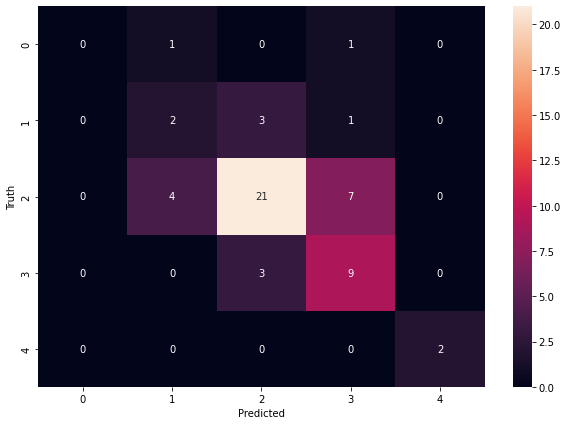

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')